In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from pandas import Series,DataFrame
from datetime import datetime
from dateutil.parser import parse
import time
from pandas.tseries.offsets import Hour,Minute
from __future__ import print_function
from scipy import  stats
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

In [2]:
index=pd.date_range('1/1/2015','7/19/2017',freq='30min')
index1=index[1:]
print(index)

DatetimeIndex(['2015-01-01 00:00:00', '2015-01-01 00:30:00',
               '2015-01-01 01:00:00', '2015-01-01 01:30:00',
               '2015-01-01 02:00:00', '2015-01-01 02:30:00',
               '2015-01-01 03:00:00', '2015-01-01 03:30:00',
               '2015-01-01 04:00:00', '2015-01-01 04:30:00',
               ...
               '2017-07-18 19:30:00', '2017-07-18 20:00:00',
               '2017-07-18 20:30:00', '2017-07-18 21:00:00',
               '2017-07-18 21:30:00', '2017-07-18 22:00:00',
               '2017-07-18 22:30:00', '2017-07-18 23:00:00',
               '2017-07-18 23:30:00', '2017-07-19 00:00:00'],
              dtype='datetime64[ns]', length=44641, freq='30T')


In [3]:
datas=pd.read_csv('C:\\Users\\HongYuChai\\Desktop\\datachy\\nsw.csv')
datas

,SETTLEMENTDATE,TOTALDEMAND
0,2015/1/1 0:30,6920.94
1,2015/1/1 1:00,6668.71
2,2015/1/1 1:30,6327.71
3,2015/1/1 2:00,6056.02
4,2015/1/1 2:30,5827.97
5,2015/1/1 3:00,5711.33
6,2015/1/1 3:30,5653.85
7,2015/1/1 4:00,5625.27
8,2015/1/1 4:30,5618.95
9,2015/1/1 5:00,5580.51


In [4]:
dta=pd.Series(datas['TOTALDEMAND'])
dta.index=pd.Index(pd.date_range('1/1/2015','7/19/2017',freq='30min')[1:])
dta.dropna(inplace=True)
dta

2015-01-01 00:30:00     6920.94
2015-01-01 01:00:00     6668.71
2015-01-01 01:30:00     6327.71
2015-01-01 02:00:00     6056.02
2015-01-01 02:30:00     5827.97
2015-01-01 03:00:00     5711.33
2015-01-01 03:30:00     5653.85
2015-01-01 04:00:00     5625.27
2015-01-01 04:30:00     5618.95
2015-01-01 05:00:00     5580.51
2015-01-01 05:30:00     5589.51
2015-01-01 06:00:00     5646.63
2015-01-01 06:30:00     5806.57
2015-01-01 07:00:00     5998.21
2015-01-01 07:30:00     6221.81
2015-01-01 08:00:00     6361.85
2015-01-01 08:30:00     6572.36
2015-01-01 09:00:00     6777.41
2015-01-01 09:30:00     6984.62
2015-01-01 10:00:00     7149.04
2015-01-01 10:30:00     7298.73
2015-01-01 11:00:00     7473.69
2015-01-01 11:30:00     7657.83
2015-01-01 12:00:00     7799.16
2015-01-01 12:30:00     7916.74
2015-01-01 13:00:00     8056.15
2015-01-01 13:30:00     8266.21
2015-01-01 14:00:00     8448.61
2015-01-01 14:30:00     8672.66
2015-01-01 15:00:00     8853.28
                         ...   
2017-07-

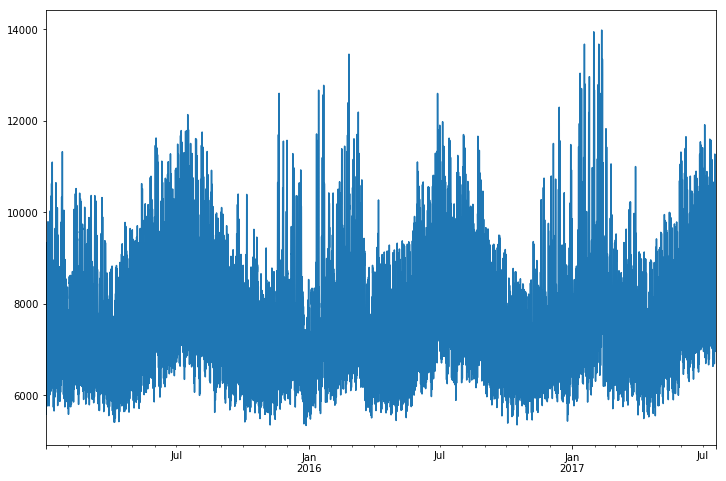

In [28]:
dta.plot(figsize=(12,8));

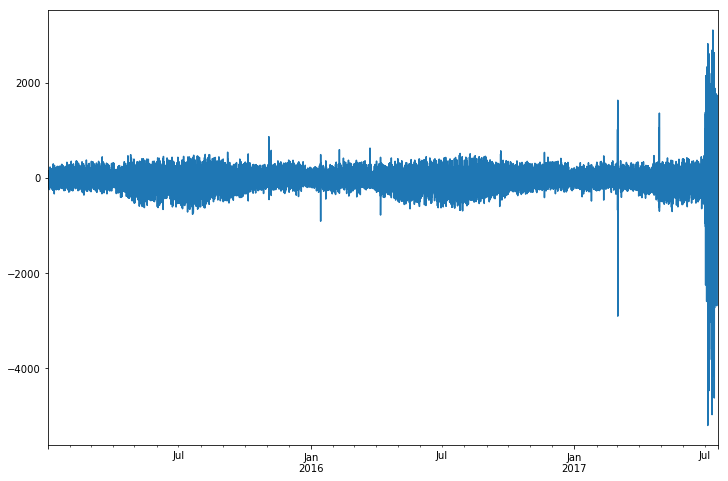

In [36]:
fig = plt.figure(figsize=(12,8))
ax1= fig.add_subplot(111)
diff1 = dta.diff(1)
diff1.plot(ax=ax1)

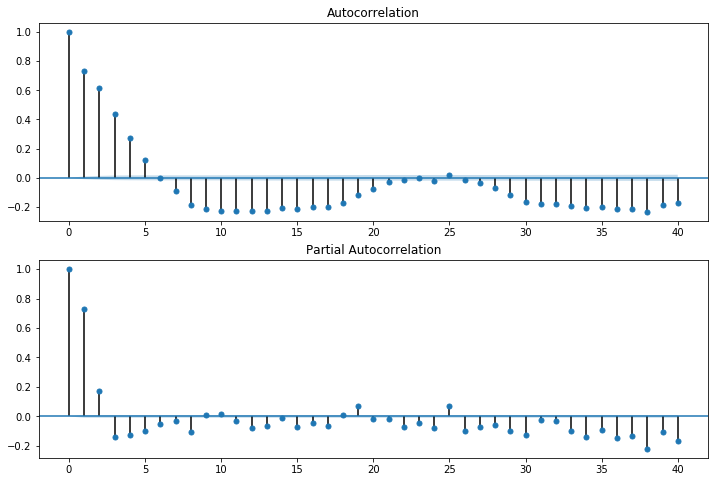

In [37]:
dta.dropna(inplace=True)
diff1= dta.diff(1)
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta,lags=40,ax=ax2)

In [31]:
#fig = plt.figure(figsize=(12,8))
#ax2= fig.add_subplot(111)
#diff2 = dta.diff(2)
#diff2.plot(ax=ax2)

In [32]:
#fig = plt.figure(figsize=(12,8))
#ax3= fig.add_subplot(111)
#diff2 = dta.diff(3)
#diff2.plot(ax=ax3)

In [44]:
from statsmodels.tsa.stattools import adfuller as ADF
ADF(dta)[1]

5.4222145261131407e-26

In [13]:
dta.dropna(inplace=True)
arma_mod20 = sm.tsa.ARMA(dta,(7,0)).fit()
print(arma_mod20.aic,arma_mod20.bic,arma_mod20.hqic)

573883.724449 573962.081717 573908.399537


In [14]:
arma_mod30 = sm.tsa.ARMA(dta,(0,1)).fit()
print(arma_mod30.aic,arma_mod30.bic,arma_mod30.hqic)

592984.049808 593010.168897 592992.274837


In [52]:
arma_mod31 = sm.tsa.ARMA(dta,(3,1)).fit()
print(arma_mod40.aic,arma_mod40.bic,arma_mod40.hqic)

572400.759934 572452.998248 572417.210018


In [8]:
arma_mod74 = sm.tsa.ARMA(dta,(7,4)).fit()
print(arma_mod74.aic,arma_mod74.bic,arma_mod74.hqic)

569301.642565 569414.825578 569337.284414


In [9]:
predict_dta = arma_mod74.predict('7/1/2017','7/17/2017', dynamic=True)
print(predict_dta)

2017-07-01 00:00:00    9307.740866
2017-07-01 00:30:00    9120.721735
2017-07-01 01:00:00    8915.045879
2017-07-01 01:30:00    8670.826485
2017-07-01 02:00:00    8404.184067
2017-07-01 02:30:00    8102.721091
2017-07-01 03:00:00    7823.488368
2017-07-01 03:30:00    7569.338176
2017-07-01 04:00:00    7392.062870
2017-07-01 04:30:00    7296.827423
2017-07-01 05:00:00    7285.950923
2017-07-01 05:30:00    7355.900568
2017-07-01 06:00:00    7455.978075
2017-07-01 06:30:00    7579.512379
2017-07-01 07:00:00    7663.650873
2017-07-01 07:30:00    7712.937807
2017-07-01 08:00:00    7702.112994
2017-07-01 08:30:00    7649.557477
2017-07-01 09:00:00    7583.665100
2017-07-01 09:30:00    7519.009478
2017-07-01 10:00:00    7508.515621
2017-07-01 10:30:00    7540.985887
2017-07-01 11:00:00    7647.861797
2017-07-01 11:30:00    7791.532569
2017-07-01 12:00:00    7959.508591
2017-07-01 12:30:00    8115.794579
2017-07-01 13:00:00    8220.912222
2017-07-01 13:30:00    8274.579299
2017-07-01 14:00:00 

C:\Users\HongYuChai\Anaconda2\lib\site-packages\statsmodels\base\data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


In [10]:
arma_mod74.forecast(5)

(array([ 8098.51172416,  8003.15630355,  7829.21553751,  7655.51025343,
         7529.69281455]),
 array([ 142.19903781,  260.1542182 ,  390.28081215,  517.70669132,
         640.2918976 ]),
 array([[ 7819.80673142,  8377.2167169 ],
        [ 7493.26340545,  8513.04920164],
        [ 7064.27920183,  8594.1518732 ],
        [ 6640.82378389,  8670.19672298],
        [ 6274.74375567,  8784.64187344]]))

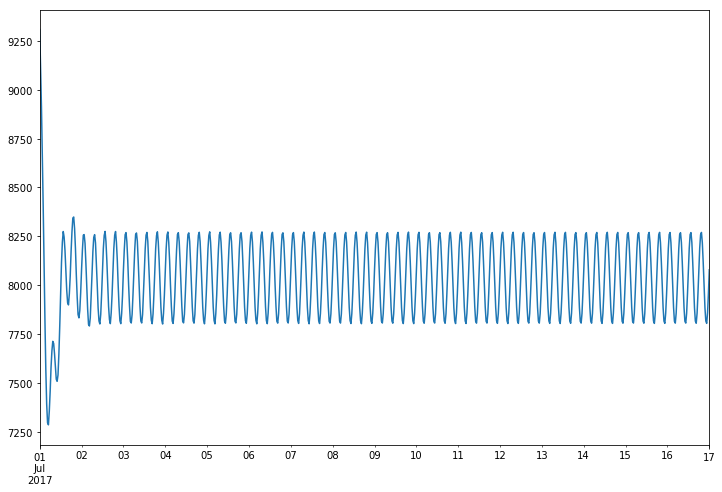

In [11]:
predict_dta.plot(figsize=(12,8));

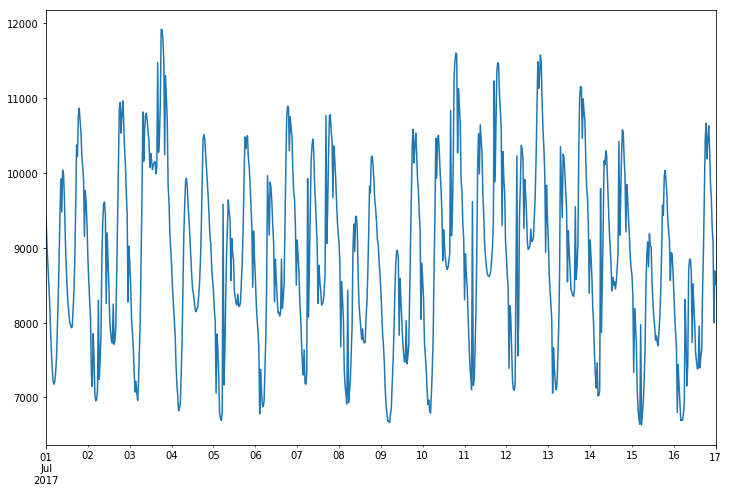

In [14]:
dta2=dta['2017-07-01 00:00:00':'2017-07-17 00:00:00']
dta2.plot(figsize=(12,8));

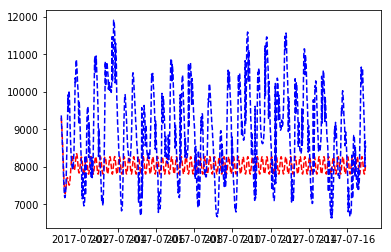

In [16]:
plt.plot(predict_dta, 'r--', dta2, 'b--')
plt.show()

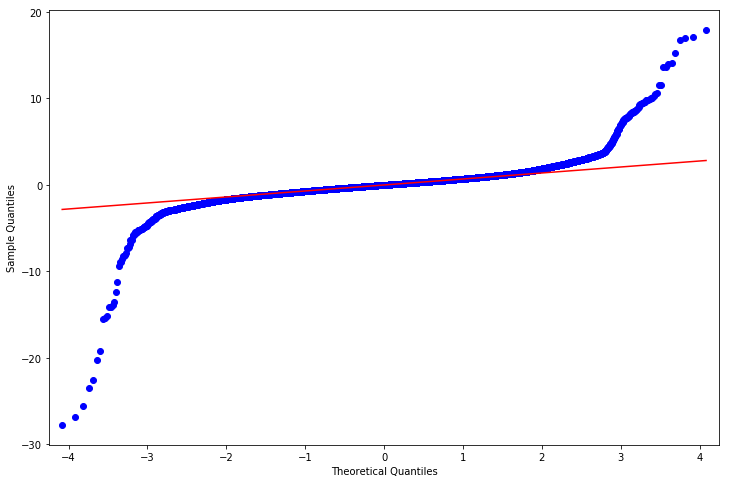

In [17]:
resid = arma_mod74.resid#残差
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

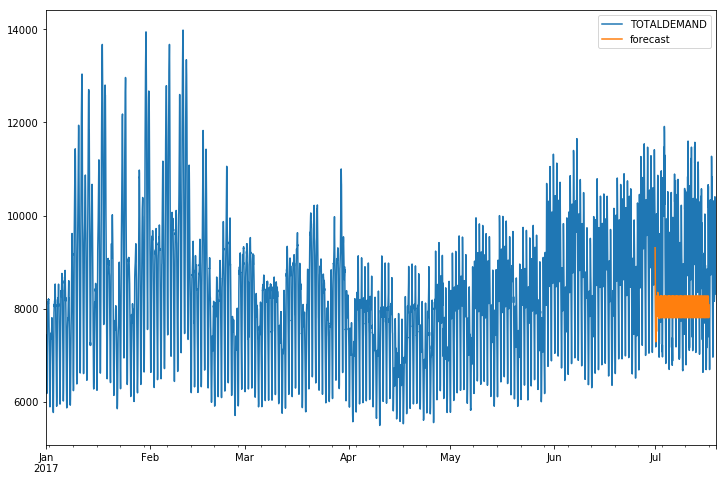

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = dta.ix['2017':].plot(ax=ax)
fig = arma_mod74.plot_predict('2017/7/1', '2017/7/17', dynamic=True, ax=ax, plot_insample=False)
plt.show()